# Project 3

## ECE3311 "Principles of Communication Systems" (B-Term 2020)

## Python Scripts

In [2]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.interpolate

In [3]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

# Section 3: Pulse Shaping Fundamentals

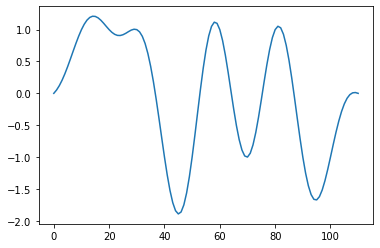

In [4]:
# Generate random polar data
d = 2*np.around(np.random.random((10,)))-1

# Define sinc pulse shape
ps_sinc = np.sinc(np.arange(-11,11,0.1))

# Create transmission using Sinc pulse shape

# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))
d_upsample[::N] = d  #impulse train
sig_temp = np.convolve(d_upsample, ps_sinc)
sig1 = sig_temp[100:211]

# Sanity check
plt.plot(sig1)
plt.show()

# Sample the received waveform to 
# extract out of it the desired values
index = np.arange(10,110,10)
d_hat1 = sig1[index]

# Section 4: Raised Cosine Pulse Shapes

In [5]:
# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Section 5: Square-Root Raised Cosine Pulse Shapes

In [6]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
ps_srrcos = rrcosfilter(61,0.5,1,10)

# Section 6: Intersymbol Interference & Equalization

In [7]:
# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]

# Section 7: AM, PM, & FM

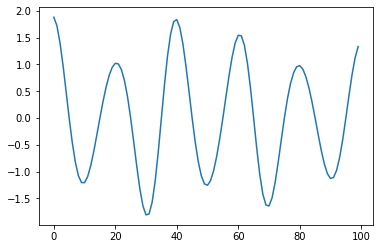

In [8]:
# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 100  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
sig_am = (np.ones((len(analog_wavefm))) + analog_wavefm)*np.exp(1j*w_c*n).real

# Sanity check 
plt.plot(sig_am)
plt.show()

## End of Project Code